## Learning CNNs using Fashion-MNIST

This will bulld CNNS using the Fashion-MINST dataset. In particular, we will
*   Use MNIST Fashion to study CNN architectures and parameters.

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)



## Overview


This focuses on how to classify **fashion_mnist** data with a simple **Convolutional Neural Network** in Keras.
Keras is part of the core TensorFlow library, in addition to being an independent open source project.

The [fashion_mnist](https://github.com/zalandoresearch/fashion-mnist) dataset consists of
60,000 train and 10,000 test instances. The aim is to classify an image into one of 10 categories. The possible categories/labals are:

<br> **Label**	**Description**
<br> 0 T-shirt/top
<br> 1 Trouser
<br> 2 Pullover
<br> 3 Dress
<br> 4 Coat
<br> 5 Sandal
<br> 6 Shirt
<br> 7 Sneaker
<br> 8 Bag
<br> 9 Ankle boot

Each gray-scale input is a 28x28 low-resolution image.

>>[Learning CNNs using Fashion-MNIST](#scrollTo=XLMRPLVCFwEc)

>>[Notebook Overview](#scrollTo=Ixyte299ZZgk)

>>[Download the fashion_mnist data](#scrollTo=LbCigZtNZZgl)

>>[Visualize the data](#scrollTo=tWORMSC8FDR4)

>>[Data normalization](#scrollTo=Zx-Ee6LHZZgt)

>>[Split the data into train/validation/test data sets](#scrollTo=CFlNHktHBtru)

>>[Create the basic model architecture](#scrollTo=HhalcO03ZZg3)

>>[Compile the model](#scrollTo=FhxJ5dinZZg8)

>>[Train the model](#scrollTo=DtOvh3YVZZg_)

>>[Load Model with the best validation accuracy](#scrollTo=e-MGLwZQy05d)

>>[Test Accuracy](#scrollTo=9RTRkan4yq5H)

>>[Visualize prediction](#scrollTo=oJv7XEk10bOv)

>>[Congragulations!](#scrollTo=8AehWdRAVKN5)



## Download the fashion_mnist data
First let's install TensorFlow version 1.8.0 and import Tensorflow. Then we download fashion-mnist which is one of the Keras datasets.

In [ ]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [ ]:
tf.__version__

'2.11.0'

## Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


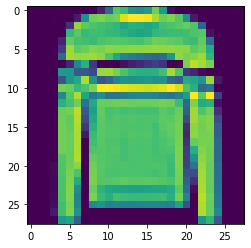

In [ ]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Data normalization
Normalize the data dimensions so that they are of approximately the same scale.

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## Split the data into train/validation/test data sets


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.



In [ ]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Create the basic model architecture

There are two APIs for defining a model in Keras:
1. [Sequential model API](https://keras.io/models/sequential/)
2. [Functional API](https://keras.io/models/model/)

In this workflow we are using the Sequential model API.


In defining the model we will be using some of these Keras APIs:
*   Conv2D() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D/) - create a convolutional layer
*   Pooling() [link text](https://keras.io/layers/pooling/) - create a pooling layer
*   Dropout() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) - apply drop out

In the basic architecture we create two convolutional layers, and then an inference layer.

The key parameters for a convolution layer are:
for convolution--(a) number of convolution filters; (b) kernel size;
for pooling--kernel for pooling-size;
for dropout--dropout probability. We will refer to these as the convolution-layer parameters.

The inference-layer parameters are:
(a) hidden layer vector-size and activation;
(b) dropout probability;
(c) output-layer activation.

When we design a network we can specify the CNN model using these parameters.

In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

## Compile the model
Configure the learning process with compile() API before training the model. It receives three arguments:

*   An optimizer
*   A loss function
*   A list of metrics


In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Train the model

Now let's train the model with fit() API.

We use  the [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API to save the model after every epoch. Set "save_best_only = True" to save only when the validation accuracy improves.


In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='base_model_weights.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.6082 - accuracy: 0.7782
Epoch 1: val_loss improved from inf to 0.38288, saving model to base_model_weights.hdf5
860/860 [==============================] - 14s 10ms/step - loss: 0.6082 - accuracy: 0.7782 - val_loss: 0.3829 - val_accuracy: 0.8626
Epoch 2/10
856/860 [============================>.] - ETA: 0s - loss: 0.4127 - accuracy: 0.8503
Epoch 2: val_loss improved from 0.38288 to 0.31757, saving model to base_model_weights.hdf5
860/860 [==============================] - 8s 9ms/step - loss: 0.4129 - accuracy: 0.8502 - val_loss: 0.3176 - val_accuracy: 0.8890
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3667 - accuracy: 0.8656
Epoch 3: val_loss improved from 0.31757 to 0.29335, saving model to base_model_weights.hdf5
860/860 [==============================] - 4s 5ms/step - loss: 0.3667 - accuracy: 0.8656 - val_loss: 0.2934 - val_accuracy: 0.8936
Epoch 4/10
853/860 [=========================

## Load Model with the best validation accuracy

In [ ]:
# Load the weights with the best validation accuracy
model.load_weights('base_model_weights.hdf5')

## Test Accuracy

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

accuracy = {}
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
accuracy["Base Model"] = score[1]


 Test accuracy: 0.9089000225067139


## Visualize prediction
Now let's visualize the prediction using the model you just trained.
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

313/313 [==============================] - 1s 2ms/step


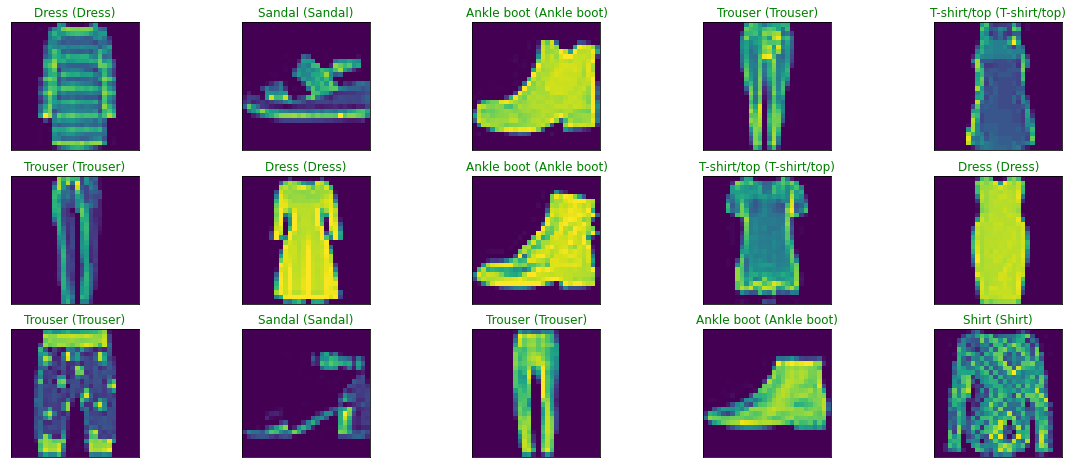

In [ ]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## Task 1: Architecture Comparison
The code given above is called the baseline architecture, and will successfully train a CNN to classify fashion-MNIST with near 90% accuracy.
We now want to compare other different architectures.

The results will be reported in a table with the first column describing the architecture and the second column the predictive accuracy of the model on the data.

I will discuss on how the changes to architecture influence the change in accuracy, if there is any significant change.
* impact of number of filters
* impact of kernel size
* impact of dropout probability
* impact of number of layers
* impact of combining multiple changes.






In [ ]:
from collections import OrderedDict
model_settings = OrderedDict({
    "models": {
        'base_model_reduced_filters_3_6': [
            ["Conv2D", 3, 2, 'same', 'relu', (28, 28, 1)],
            ["MaxPooling2D", 2],
            ["Dropout", 0.3],
            ["Conv2D", 6, 2, 'same', 'relu'],
            ["MaxPooling2D", 2],
            ["Dropout", 0.3],
            ["Flatten"],
            ["Dense", 256, 'relu'],
            ["Dropout", 0.5]
        ],
        'base_model_increased_filter_128_256': [
            ["Conv2D", 128, 2, 'same', 'relu', (28, 28, 1)],
            ["MaxPooling2D", 2],
            ["Dropout", 0.3],
            ["Conv2D", 256, 2, 'same', 'relu'],
            ["MaxPooling2D", 2],
            ["Dropout", 0.3],
            ["Flatten"],
            ["Dense", 256, 'relu'],
            ["Dropout", 0.5]
        ],
        'base_model_decreased_kernel_1': [
            ["Conv2D", 64, 1, 'same', 'relu', (28, 28, 1)],
            ["MaxPooling2D", 2],
            ["Dropout", 0.3],
            ["Conv2D", 32, 1, 'same', 'relu'],
            ["MaxPooling2D", 2],
            ["Dropout", 0.3],
            ["Flatten"],
            ["Dense", 256, 'relu'],
            ["Dropout", 0.5]
        ],
        'base_model_increased_pooling_4': [
            ["Conv2D", 64, 2, 'same', 'relu', (28, 28, 1)],
            ["MaxPooling2D", 4],
            ["Dropout", 0.3],
            ["Conv2D", 32, 2, 'same', 'relu'],
            ["MaxPooling2D", 4],
            ["Dropout", 0.3],
            ["Flatten"],
            ["Dense", 256, 'relu'],
            ["Dropout", 0.5]
        ],
        'base_model_increased_dropout_50_50': [
            ["Conv2D", 64, 1, 'same', 'relu', (28, 28, 1)],
            ["MaxPooling2D", 2],
            ["Dropout", 0.5],
            ["Conv2D", 32, 1, 'same', 'relu'],
            ["MaxPooling2D", 2],
            ["Dropout", 0.5],
            ["Flatten"],
            ["Dense", 256, 'relu'],
            ["Dropout", 0.5]
        ],
        'base_model_decresed_dropout_10_20': [
            ["Conv2D", 64, 2, 'same', 'relu', (28, 28, 1)],
            ["MaxPooling2D", 2],
            ["Dropout", 0.1],
            ["Conv2D", 32, 2, 'same', 'relu'],
            ["MaxPooling2D", 2],
            ["Dropout", 0.2],
            ["Flatten"],
            ["Dense", 256, 'relu'],
            ["Dropout", 0.5]
        ],
         'base_model_add_conv_layer': [
            ["Conv2D", 128, 2, 'same', 'relu', (28, 28, 1)],
            ["Conv2D", 64, 2, 'same', 'relu'],
            ["MaxPooling2D", 2],
            ["Dropout", 0.3],
            ["Conv2D", 32, 2, 'same', 'relu'],
            ["MaxPooling2D", 2],
            ["Dropout", 0.3],
            ["Flatten"],
            ["Dense", 256, 'relu'],
            ["Dropout", 0.5]
        ],
        'model_with_new_architecture_vgg_net': [
            ["Conv2D", 64, 2, 'same', 'relu', (28, 28, 1)],
            ["Conv2D", 64, 2, 'same', 'relu'],
            ["MaxPooling2D", 2],

            ["Conv2D", 128, 2, 'same', 'relu'],
            ["Conv2D", 128, 2, 'same', 'relu'],
            ["Conv2D", 128, 2, 'same', 'relu'],
            ["MaxPooling2D", 2],

            ["Flatten"],
            ["Dense", 256, 'relu'],
            ["Dropout", 0.2],
            ["Dense", 256, 'relu'],
            ["Dropout", 0.2],
            ["Dense", 256, 'relu'],
            ["Dropout", 0.2]

        ],
          'model_with_new_architecture_2': [
            ["Conv2D", 32, 3, 'same', 'relu', (28, 28, 1)],
            ["MaxPooling2D", 2],

            ["Conv2D", 64, 3, 'same', 'relu'],
            ["MaxPooling2D", 2],

            ["Conv2D", 128, 3, 'same', 'relu'],
            ["MaxPooling2D", 2],

            ["Flatten"],
            ["Dense", 256, 'relu'],
            ["Dropout", 0.5]
        ],
          'model_with_new_architecture_3': [
            ["Conv2D", 32, 3, 'same', 'relu', (28, 28, 1)],
            ["Conv2D", 32, 3, 'same', 'relu'],
            ["MaxPooling2D", 2],
            ["Dropout", 0.25],

            ["Conv2D", 64, 3, 'same', 'relu'],
            ["Conv2D", 64, 3, 'same', 'relu'],
            ["MaxPooling2D", 2],
            ["Dropout", 0.25],

            ["Conv2D", 128, 3, 'same', 'relu'],
            ["Conv2D", 128, 3, 'same', 'relu'],
            ["MaxPooling2D", 2],
            ["Dropout", 0.25],

            ["Flatten"],
            ["Dense", 512, 'relu'],
            ["Dropout", 0.5],
        ]

    }
})



In [ ]:

for key, value in model_settings["models"].items():
    model = tf.keras.Sequential()
    for params in value:
        if params[0] == "Conv2D":
            if len(params) > 5:
                model.add(tf.keras.layers.Conv2D(filters=params[1], kernel_size=params[2], padding=params[3], activation=params[4], input_shape=params[5]))
            else:
                model.add(tf.keras.layers.Conv2D(filters=params[1], kernel_size=params[2], padding=params[3], activation=params[4]))
        elif params[0] == "MaxPooling2D":
            model.add(tf.keras.layers.MaxPooling2D(pool_size=params[1]))
        elif params[0] == "Dropout":
            model.add(tf.keras.layers.Dropout(params[1]))
        elif params[0] == "Flatten":
            model.add(tf.keras.layers.Flatten())
        elif params[0] == "Dense":
            model.add(tf.keras.layers.Dense(params[1], activation=params[2]))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.build((28, 28, 1))
    # print(model.summary())

    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

    checkpointer = ModelCheckpoint(filepath=key+'.hdf5', verbose = 1, save_best_only=True)

    model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])
    model.load_weights(key+'.hdf5')

    score = model.evaluate(x_test, y_test, verbose=0)
    accuracy[key] = score[1]
    print('\n', 'Test accuracy:', score[1],' for :',key,'.hdf5')

Epoch 1/10
860/860 [==============================] - ETA: 0s - loss: 0.8722 - accuracy: 0.6663
Epoch 1: val_loss improved from inf to 0.58621, saving model to base_model_reduced_filters_3_6.hdf5
860/860 [==============================] - 7s 6ms/step - loss: 0.8722 - accuracy: 0.6663 - val_loss: 0.5862 - val_accuracy: 0.8046
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.6384 - accuracy: 0.7594
Epoch 2: val_loss improved from 0.58621 to 0.48425, saving model to base_model_reduced_filters_3_6.hdf5
860/860 [==============================] - 4s 5ms/step - loss: 0.6384 - accuracy: 0.7594 - val_loss: 0.4842 - val_accuracy: 0.8390
Epoch 3/10
856/860 [============================>.] - ETA: 0s - loss: 0.5626 - accuracy: 0.7895
Epoch 3: val_loss improved from 0.48425 to 0.44101, saving model to base_model_reduced_filters_3_6.hdf5
860/860 [==============================] - 4s 5ms/step - loss: 0.5623 - accuracy: 0.7896 - val_loss: 0.4410 - val_accuracy: 0.8498
Epoch 4/10


In [ ]:
from tabulate import tabulate

headers = ["Name", "Accuracy"]

print(tabulate([], headers=headers, tablefmt="heavy_outline"))

for key, value in accuracy.items():
        print(tabulate([[key, str(value)]], tablefmt="heavy_outline"))

Name    Accuracy
------  ----------
----------  ------
Base Model  0.9089
----------  ------
------------------------------  -----
base_model_reduced_filters_3_6  0.874
------------------------------  -----
-----------------------------------  ------
base_model_increased_filter_128_256  0.9211
-----------------------------------  ------
-----------------------------  ------
base_model_decreased_kernel_1  0.8356
-----------------------------  ------
------------------------------  ------
base_model_increased_pooling_4  0.8012
------------------------------  ------
----------------------------------  ------
base_model_increased_dropout_50_50  0.7461
----------------------------------  ------
---------------------------------  -----
base_model_decresed_dropout_10_20  0.913
---------------------------------  -----
-------------------------  ------
base_model_add_conv_layer  0.9198
-------------------------  ------
-----------------------------------  ------
model_with_new_architecture_vgg_

Description of how the changes to architecture influence the change in accuracy, if there is any significant change. Specifically, describe:



1.   impact of number of filters

    Large number of filters improve the accuracy and increase the time
    Small number of filters have decreased accuracy as it can be seen in first two models

2. impact of kernel size

    Small kernel size can decrease the acuracy by overfitting as every small feature is treated by 1X1 in the example(base_model_decreased_kernel)

    Increasing the size of maxpool also decreases the accuracy as most of the features might be missed with a larger size of pooling kernel. The size of the image will become smaller and smaller

3. impact of dropout probability

    Increased dropout will decrease the accuracy due to underfitting. A smaller dropout may cause overfitting. In this network 20 to 40% is ideal dropout rate


4. impact of number of layers
    Adding an extra conv layer has slightly increased the accuracy. Increase in number of layers causes increase in traning time. may cause overfitting if there are too many layers

5. impact of combining multiple changes.

    using the VGG net architecture the accuracy improved.
    Adding multiple layers and combination slightly increased the accuracy
    I